In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.0


# Validation, regularisation and callbacks

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

In [3]:
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
# Save the input and target variables

X = diabetes_dataset['data'];
y = diabetes_dataset['target']

In [5]:
# Normalise the target data (this will make clearer training curves)
import numpy as np
mean_y = np.mean(y)
std_y = np.std(y)

y = (y - mean_y)/ std_y

In [6]:
y.min(), y.max()

(-1.6509610124214391, 2.5175590944313466)

In [7]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(y_train.shape)

(397, 10)
(397,)


#### Train a feedforward neural network model

In [11]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(1)
    ])
    return model

model = get_model()

In [12]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               1408      
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                

In [13]:
# Compile the model
from tensorflow.keras.losses import MeanSquaredError as mse
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError as mae

model.compile(optimizer = Adam(), loss = mse(), metrics = [mae()])

In [14]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train, y_train, validation_split = .15, epochs = 75, verbose = 1)

Epoch 1/75
11/11 [==============================] - 2s 42ms/step - loss: 0.9757 - mean_absolute_error: 0.8503 - val_loss: 0.7712 - val_mean_absolute_error: 0.7402
Epoch 2/75
11/11 [==============================] - 0s 7ms/step - loss: 0.7067 - mean_absolute_error: 0.7290 - val_loss: 0.5866 - val_mean_absolute_error: 0.6244
Epoch 3/75
11/11 [==============================] - 0s 8ms/step - loss: 0.5365 - mean_absolute_error: 0.5855 - val_loss: 0.5932 - val_mean_absolute_error: 0.6276
Epoch 4/75
11/11 [==============================] - 0s 10ms/step - loss: 0.4947 - mean_absolute_error: 0.5811 - val_loss: 0.6077 - val_mean_absolute_error: 0.6446
Epoch 5/75
11/11 [==============================] - 0s 8ms/step - loss: 0.4759 - mean_absolute_error: 0.5662 - val_loss: 0.5942 - val_mean_absolute_error: 0.6206
Epoch 6/75
11/11 [==============================] - 0s 7ms/step - loss: 0.4690 - mean_absolute_error: 0.5521 - val_loss: 0.5725 - val_mean_absolute_error: 0.6025
Epoch 7/75
11/11 [========

In [15]:
# Evaluate the model on the test set
loss, metric = model.evaluate(X_test, y_test, verbose = 0)
print(loss, metric)

0.6861612796783447 0.6163297295570374


#### Plot the learning curves

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)

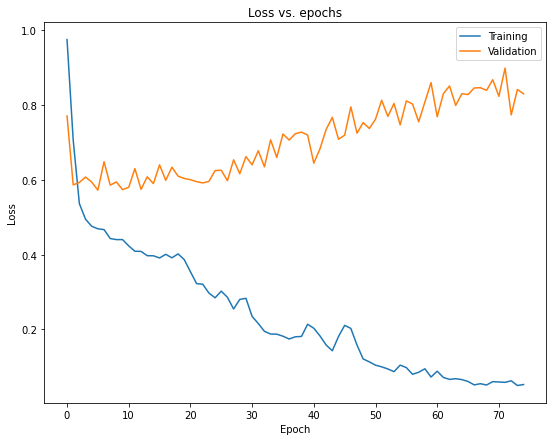

In [17]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [19]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = regularizers.l2(wd), activation="relu", input_shape=(X_train.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = regularizers.l2(wd),activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [20]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 3e-1)

In [21]:
# Compile the model

model.compile(optimizer = Adam(), loss = mse(), metrics = [mae()])

In [22]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train, y_train, validation_split = .15, epochs = 75, verbose = 1)

Epoch 1/75
11/11 [==============================] - 2s 35ms/step - loss: 1.0189 - mean_absolute_error: 0.8641 - val_loss: 0.8851 - val_mean_absolute_error: 0.7878
Epoch 2/75
11/11 [==============================] - 0s 9ms/step - loss: 0.9838 - mean_absolute_error: 0.8546 - val_loss: 0.8431 - val_mean_absolute_error: 0.7767
Epoch 3/75
11/11 [==============================] - 0s 9ms/step - loss: 0.8324 - mean_absolute_error: 0.7906 - val_loss: 0.7654 - val_mean_absolute_error: 0.7438
Epoch 4/75
11/11 [==============================] - 0s 10ms/step - loss: 0.7346 - mean_absolute_error: 0.7288 - val_loss: 0.6568 - val_mean_absolute_error: 0.6824
Epoch 5/75
11/11 [==============================] - 0s 10ms/step - loss: 0.6171 - mean_absolute_error: 0.6624 - val_loss: 0.5816 - val_mean_absolute_error: 0.6382
Epoch 6/75
11/11 [==============================] - 0s 10ms/step - loss: 0.5793 - mean_absolute_error: 0.6211 - val_loss: 0.5748 - val_mean_absolute_error: 0.6163
Epoch 7/75
11/11 [======

In [23]:
# Evaluate the model on the test set
loss, metric = model.evaluate(X_test, y_test, verbose = 0)
print(loss, metric)

0.4139510691165924 0.47680631279945374


#### Plot the learning curves

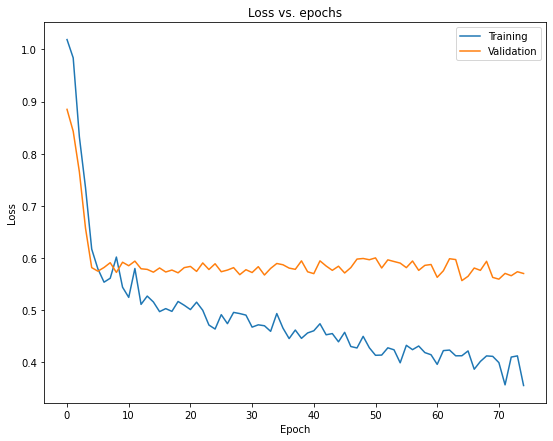

In [24]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
##  callbacks

#### Example training callback

In [26]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback
class TrainingCallback(Callback):
    def on_train_begin(self, logs = None):
        print('Starting Training...')
        
    def on_epoch_begin(self, epoch, logs = None):
        print(f"Starting epoch {epoch}")
    
    def on_train_batch_start(self, batch, logs = None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs = None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs = None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs = None):
        print('Finished Training...')

In [27]:
# Re-build the model

model = get_regularised_model(1e-5, 3e-1)

In [28]:
# Compile the model

model.compile(optimizer = Adam(), loss = mse())

#### Train the model with the callback

In [30]:
128*3

384

In [31]:
X_train.shape[0]

397

In [29]:
# Train the model, with some of the data reserved for validation

history = model.fit(X_train, y_train, batch_size=128, epochs = 3, verbose = 0, callbacks=[TrainingCallback()])

Starting Training...
Starting epoch 0
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 0
Starting epoch 1
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 1
Starting epoch 2
Training: Finished batch 0
Training: Finished batch 1
Training: Finished batch 2
Training: Finished batch 3
Finished epoch 2
Finished Training...


***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [47]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer="adam", loss="mse")
unreg_history = unregularised_model.fit(X_train, y_train, epochs=100,
                                     validation_split = 0.15, batch_size=64, verbose = False,
                                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [34]:
# Evaluate the model on the test set

unregularised_model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 0.7468 - 40ms/epoch - 20ms/step


0.7468023300170898

In [48]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 2e-1)

regularised_model.compile(optimizer="adam", loss="mse")

reg_history = unregularised_model.fit(X_train, y_train, epochs=100,
                                     validation_split = 0.15, batch_size=64, verbose = False,
                                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

In [36]:
# Evaluate the model on the test set

regularised_model.evaluate(X_test, y_test, verbose=2)

2/2 - 0s - loss: 1.0316 - 378ms/epoch - 189ms/step


1.031616449356079

#### Plot the learning curves

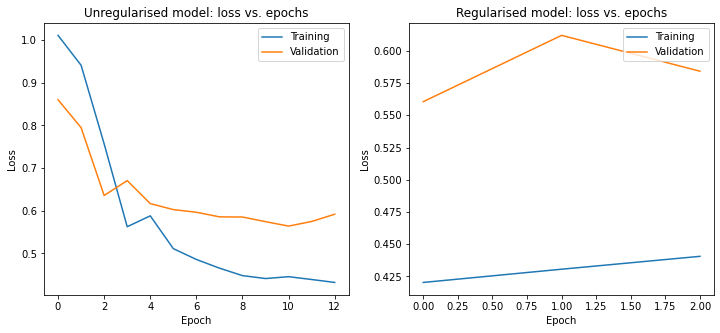

In [49]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()

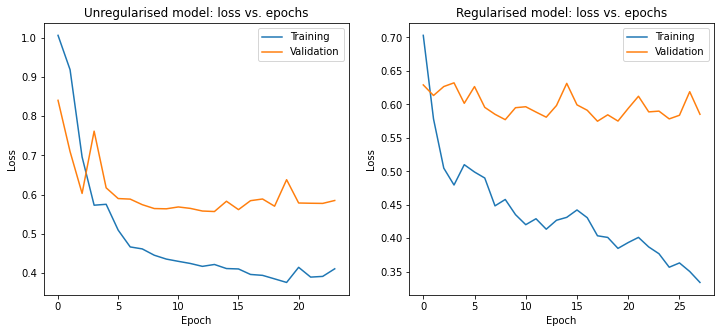

In [43]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()